In [164]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib notebook

In [101]:
import labrad
cxn = labrad.connect()

In [102]:
ss = cxn.mj_serial_server

In [114]:
ss.open('/dev/ttyACM3')

'/dev/ttyACM3'

In [115]:
ss.baudrate(115200)

115200

In [221]:
ss.read()

''

In [199]:
def func(x_values, A, sigma, x0):
    return A/(sigma*np.sqrt(2*np.pi))*np.exp(-(x_values-x0)**2/(2*sigma**2))

<IPython.core.display.Javascript object>


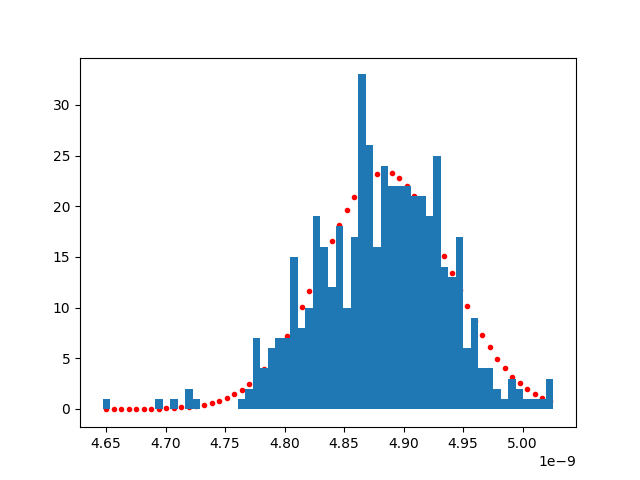

mean:  4.88410277586e-09
sigma:  5.37437476198e-11


In [209]:
data_set = []
ss.read()
for i in range(500):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [2e-9, 0.1e-9, 4.9e-9])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'mean: ', mean
print 'sigma: ', sigma

<IPython.core.display.Javascript object>


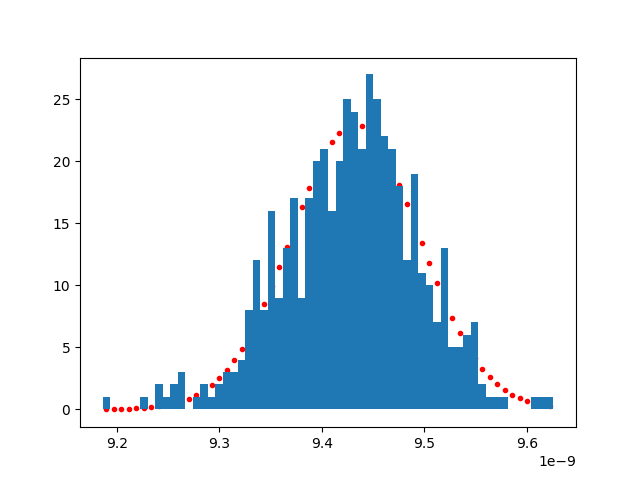

mean:  9.43230127085e-09
sigma:  6.28599722378e-11


In [213]:
data_set = []
ss.read()
for i in range(500):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [2e-9, 0.1e-9, 9.9e-9])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'mean: ', mean
print 'sigma: ', sigma

<IPython.core.display.Javascript object>


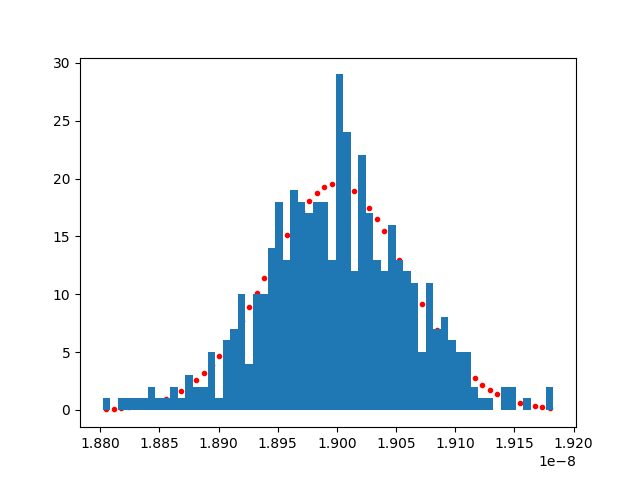

mean:  1.89997180633e-08
sigma:  5.87873329761e-11


In [222]:
data_set = []
ss.read()
for i in range(500):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [2e-9, 0.1e-9, 19.0e-9])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'mean: ', mean
print 'sigma: ', sigma

<IPython.core.display.Javascript object>


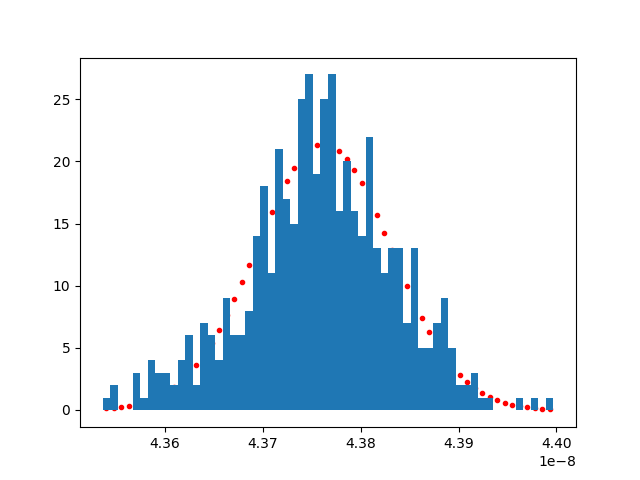

mean:  4.37619261702e-08
sigma:  6.90282857485e-11


In [227]:
data_set = []
ss.read()
for i in range(500):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [2e-9, 0.2e-9, 43.5e-9])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'mean: ', mean
print 'sigma: ', sigma

<IPython.core.display.Javascript object>


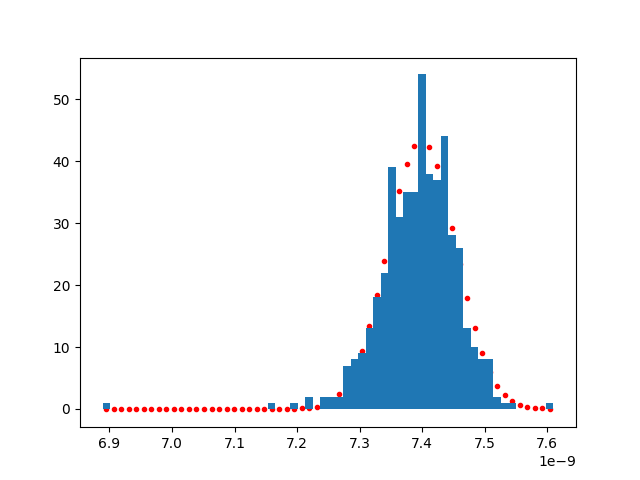

mean:  7.39918746863e-09
sigma:  5.455254601e-11


In [231]:
data_set = []
ss.read()
for i in range(500):
    data = ss.read_line()
    try:
        data_set.append(float(data[0:14]))
    except:
        continue
    time.sleep(0.05)
n, bins, patches = plt.hist(np.array(data_set), 60)
bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
popt, pcov = curve_fit(func, bin_centers, n, p0 = [2e-9, 0.2e-9, 7.5e-9])
plt.scatter(bin_centers, func(bin_centers, *popt), color='red', marker='.')
mean = popt[2]
sigma = popt[1]
print 'mean: ', mean
print 'sigma: ', sigma